In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
req = requests.get('https://www.atlasbig.com/en-us/countries-onion-production')
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

Requisição bem sucedida!


In [3]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

In [4]:
table_str = str(table)
df = pd.read_html(table_str)[0]

In [5]:
table = soup.find(name='table', attrs={'id':'data-table-2-0-1'})

In [6]:
drop_indexes = df[df['Country'] == 'Country'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

In [7]:
df

,Unnamed: 0,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,NaN,China,23907509,17.152,1086711,21999.9
1,NaN,India,19415425,14.527,1199850,16181.5
2,NaN,Egypt,3115482,31.955,84878,36705.4
3,NaN,United States of America,3025700,9.231,53650,56397.0
4,NaN,Iran,2345768,28.692,61809,37951.9
...,...,...,...,...,...,...
135,NaN,Luxembourg,120,0.199,4,29703.0
136,NaN,Montserrat,95,19.388,36,2656.1
137,NaN,Saint Kitts and Nevis,60,1.299,5,11468.0
138,NaN,Bermuda,53,0.831,4,12361.4


In [8]:
#df.drop(columns=["Unnamed: 0"])

In [9]:
df.dtypes

Unnamed: 0                    float64
Country                        object
Production (Tons)               int64
Production per Person (Kg)    float64
Acreage (Hectare)               int64
Yield (Kg / Hectare)          float64
dtype: object

In [10]:
df = df.astype({"Country":'category'})

In [11]:
df.dtypes

Unnamed: 0                     float64
Country                       category
Production (Tons)                int64
Production per Person (Kg)     float64
Acreage (Hectare)                int64
Yield (Kg / Hectare)           float64
dtype: object

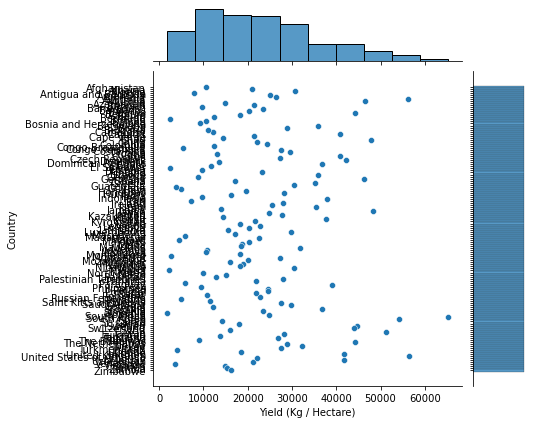

In [12]:
import seaborn as sns
sns.jointplot(x='Yield (Kg / Hectare)',y='Country',data=df,kind='scatter')

##### somente caso todas as variavéis tivessem sido baixadas como objeto:

In [13]:
df['Production (Tons)'] = pd.to_numeric(df['Production (Tons)'], errors='coerce')
df['Production per Person (Kg)'] = pd.to_numeric(df['Production per Person (Kg)'], errors='coerce')
df['Acreage (Hectare)'] = pd.to_numeric(df['Acreage (Hectare)'], errors='coerce')
df['Yield (Kg / Hectare)'] = pd.to_numeric(df['Yield (Kg / Hectare)'], errors='coerce')

<AxesSubplot:>

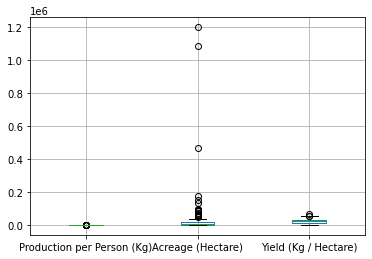

In [19]:
df.loc[:,'Production per Person (Kg)':'Yield (Kg / Hectare)'].boxplot()

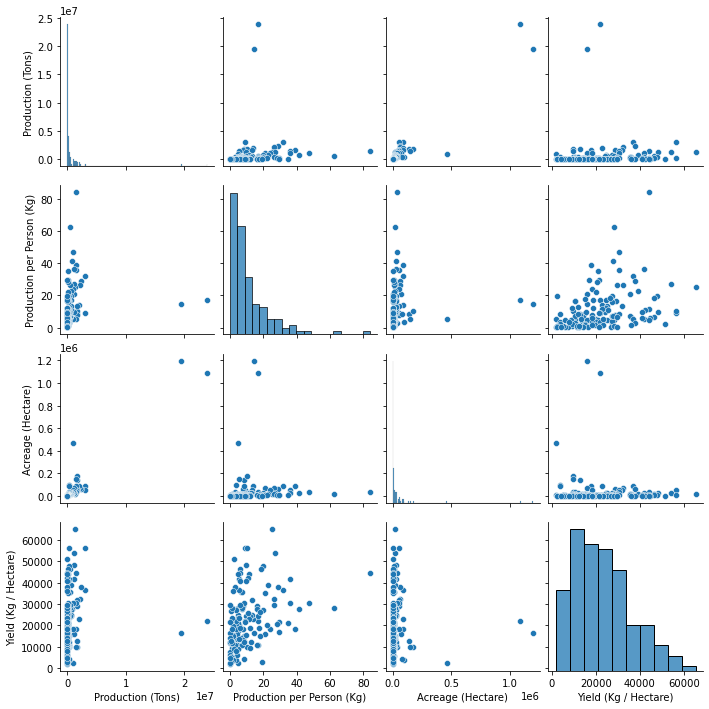

In [21]:
df.pairplot(data)